#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.
 
### CHAPTER 12
**CH12 Returns on a company stock and market returns**

version 1.0 2021-05-31
 
 

In [41]:
import os
import sys
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from mizani.breaks import date_breaks
from mizani.formatters import date_format
from mizani.formatters import percent_format
from plotnine import *
from stargazer.stargazer import Stargazer

warnings.filterwarnings("ignore")


In [42]:
stock_data = pd.read_csv("/workspaces/codespaces-jupyter/data/ready_sp500_45_cos.csv")

In [43]:
stock_data.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [44]:
stock_data["ticker"].unique()

array(['ACN', 'ADBE', 'AMD', 'AKAM', 'ADS', 'APH', 'ADI', 'ANSS', 'AAPL',
       'AMAT', 'ANET', 'ADSK', 'ADP', 'AVGO', 'BR', 'CDNS', 'CSCO',
       'CTXS', 'CTSH', 'GLW', 'DXC', 'FFIV', 'FIS', 'FISV', 'FLT', 'FLIR',
       'FTNT', 'IT', 'GPN', 'HPE', 'HPQ', 'INTC', 'IBM', 'INTU', 'IPGP',
       'JKHY', 'JNPR', 'KEYS', 'KLAC', 'LRCX', 'LDOS', 'MA', 'MXIM',
       'MCHP', 'MU', 'MSFT', 'MSI', 'NTAP', 'NVDA', 'ORCL', 'PAYX',
       'PYPL', 'QRVO', 'QCOM', 'CRM', 'STX', 'SWKS', 'SYMC', 'SNPS',
       'TEL', 'TXN', 'TSS', 'VRSN', 'V', 'WDC', 'WU', 'XRX', 'XLNX'],
      dtype=object)

In [45]:
MSFT = stock_data[stock_data["ticker"] == "MSFT"]

In [46]:
p_MSFT = (
    MSFT[["ref.date", "price.close"]]
    .rename(columns={"ref.date": "date"})
    .reset_index(drop=True)
)

In [47]:
p_MSFT["date"] = pd.to_datetime(p_MSFT["date"])


In [48]:
p_MSFT.head()

,date,price.close
0,1997-12-29,15.789063
1,1997-12-30,16.281250
2,1997-12-31,16.156250
3,1998-01-02,16.390625
4,1998-01-05,16.296875


In [49]:
sp500_index = pd.read_csv("/workspaces/codespaces-jupyter/data/ready_sp500_index.csv")

In [50]:
p_SP500 = (
    sp500_index[["ref.date", "price.close"]]
    .rename(columns={"ref.date": "date"})
    .reset_index(drop=True)
)

In [51]:
p_SP500["date"] = pd.to_datetime(p_SP500["date"])

In [52]:
data_daily = (
    pd.merge(p_SP500, p_MSFT, how="inner", on="date")
    .rename(columns={"price.close_x": "p_SP500", "price.close_y": "p_MSFT"})
    .reset_index(drop=True)
)

In [53]:
data_daily = data_daily[
    (data_daily["date"] >= "1997-12-31") & (data_daily["date"] <= "2018-12-31")
]

In [54]:
data_daily["year"] = data_daily["date"].dt.year

In [55]:
data_daily["month"] = data_daily["date"].dt.month

In [56]:
data_daily.to_csv("stock-prices-daily.csv")

# PART I: Graphs

In [57]:
data_daily["lnp_MSFT"] = data_daily["p_MSFT"].map(lambda x: np.log(x))

In [58]:
data_daily["lnp_SP500"] = data_daily["p_SP500"].map(lambda x: np.log(x))

In [59]:
limits = datetime(1998, 1, 1), datetime(2018, 1, 1)

In [60]:
breaks = date_breaks("2 year")

### Figure 12.2 Stock prices, daily time series

For time series data, plotnine wants the index to start from 0

In [61]:
data_daily = data_daily.reset_index(drop=True)

In [62]:
data_daily

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500
0,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739
1,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478
2,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558
3,1998-01-06,966.580017,16.390625,1998,1,2.796710,6.873764
4,1998-01-07,964.000000,16.195313,1998,1,2.784722,6.871091
...,...,...,...,...,...,...,...
5279,2018-12-24,2351.100098,94.129997,2018,12,4.544677,7.762639
5280,2018-12-26,2467.699951,100.559998,2018,12,4.610755,7.811042
5281,2018-12-27,2488.830078,101.180000,2018,12,4.616901,7.819568
5282,2018-12-28,2485.739990,100.389999,2018,12,4.609063,7.818326


(a) Microsoft

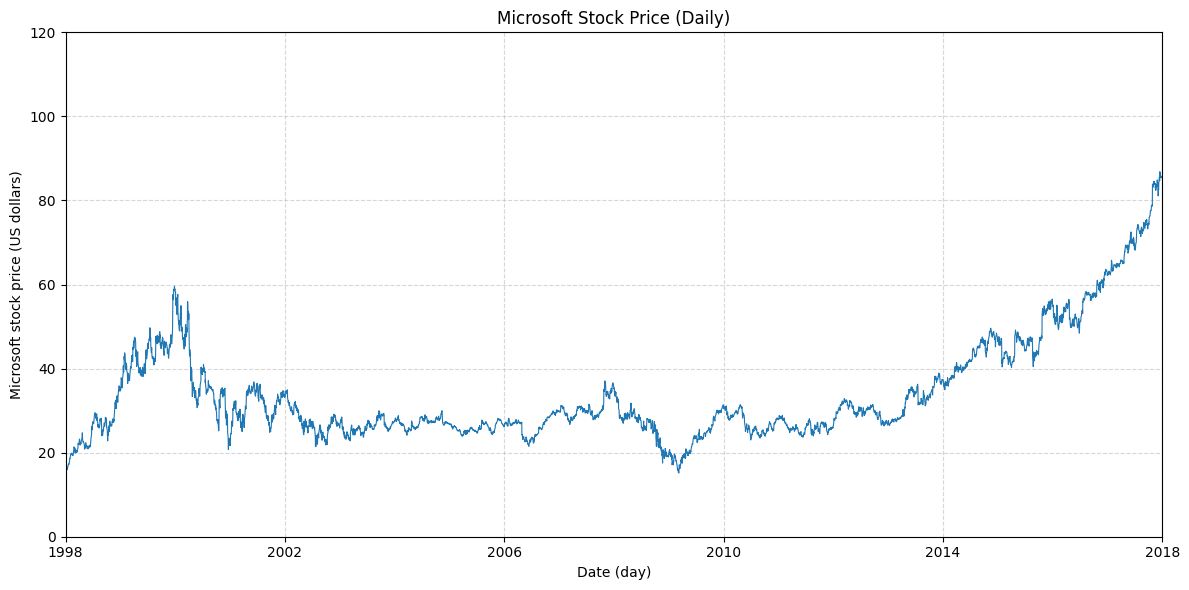

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(data_daily["date"], data_daily["p_MSFT"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 120)
plt.yticks(np.arange(0, 121, 20))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (day)")
plt.ylabel("Microsoft stock price (US dollars)")
plt.title("Microsoft Stock Price (Daily)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

(b) S&P500 index

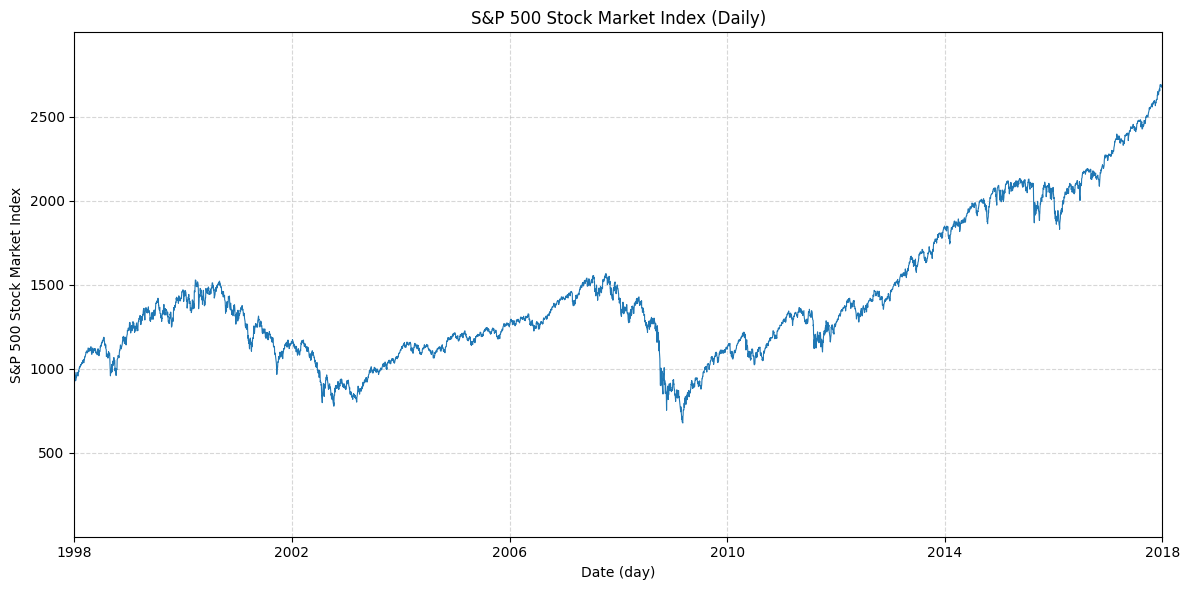

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(data_daily["date"], data_daily["p_SP500"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 3001)
plt.yticks(np.arange(500, 3000, 500))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (day)")
plt.ylabel("S&P 500 Stock Market Index")
plt.title("S&P 500 Stock Market Index (Daily)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [65]:
%pip install arch
from arch.unitroot import PhillipsPerron

Note: you may need to restart the kernel to use updated packages.


### Phillips Perron Unit Root

testing whether the Microsoft stock price series is stationary or not. If the test result shows a unit root, the series is non-stationary (its mean and variance change over time)


The Phillips-Perron test checks if a time series is stationary or has a unit root (is non-stationary).

If a series has a unit root, its mean and variance can change over time (like a random walk).
If it is stationary, its statistical properties stay the same over time.
In simple words:
Phillips-Perron tells you if your data (like stock prices) "wanders" over time or stays around a constant average. This is important for deciding how to model and forecast time series data.

In [66]:
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="n"))

     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.287
P-value                         0.994
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [67]:
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="c"))


     Phillips-Perron Test (Z-rho)    
Test Statistic                  2.245
P-value                         0.998
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [68]:
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="ct"))

     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.092
P-value                         0.995
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%), -21.69 (5%), -18.23 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [69]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="n")),
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="c")),

     Phillips-Perron Test (Z-rho)    
Test Statistic                  0.908
P-value                         0.892
Lags                               32
-------------------------------------

Trend: No Trend
Critical Values: -13.24 (1%), -7.79 (5%), -5.54 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-rho)    
Test Statistic                 -0.292
P-value                         0.940
Lags                               32
-------------------------------------

Trend: Constant
Critical Values: -20.60 (1%), -14.08 (5%), -11.24 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


(None,)

In [70]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="ct")),

     Phillips-Perron Test (Z-rho)    
Test Statistic                 -3.943
P-value                         0.894
Lags                               32
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -29.31 (1%), -21.69 (5%), -18.23 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


(None,)

In [71]:
data_daily["l.p_MSFT"] = data_daily["p_MSFT"].shift()
data_daily["l.p_SP500"] = data_daily["p_SP500"].shift()
data_daily["d.p_MSFT"] = data_daily["p_MSFT"] - data_daily["l.p_MSFT"]
data_daily["d.p_SP500"] = data_daily["p_SP500"] - data_daily["l.p_SP500"]
data_daily["PctRetMSFT"] = data_daily["d.p_MSFT"] / data_daily["l.p_MSFT"] * 100
data_daily["PctRetSP500"] = data_daily["d.p_SP500"] / data_daily["l.p_SP500"] * 100

In [72]:
data_daily["d.lnp_MSFT"] = np.log(data_daily["p_MSFT"]) - np.log(
    data_daily["p_MSFT"].shift()
)
data_daily["d.lnp_SP500"] = np.log(data_daily["p_SP500"]) - np.log(
    data_daily["p_SP500"].shift()
)

In [73]:
data_monthly = (
    data_daily[["date", "year", "month", "p_SP500", "p_MSFT"]]
    .groupby(data_daily["date"].dt.to_period("M"))
    .last()
    .reset_index(drop=True)
)

In [74]:
data_monthly

,date,year,month,p_SP500,p_MSFT
0,1997-12-31,1997,12,970.429993,16.156250
1,1998-01-30,1998,1,980.280029,18.648438
2,1998-02-27,1998,2,1049.339966,21.187500
3,1998-03-31,1998,3,1101.750000,22.375000
4,1998-04-30,1998,4,1111.750000,22.531250
...,...,...,...,...,...
248,2018-08-31,2018,8,2901.520020,112.330002
249,2018-09-28,2018,9,2913.979980,114.370003
250,2018-10-31,2018,10,2711.739990,106.809998
251,2018-11-30,2018,11,2760.169922,110.889999


In [75]:
data_monthly["l.p_MSFT"] = data_monthly["p_MSFT"].shift()
data_monthly["l.p_SP500"] = data_monthly["p_SP500"].shift()
data_monthly["d.p_MSFT"] = data_monthly["p_MSFT"] - data_monthly["l.p_MSFT"]
data_monthly["d.p_SP500"] = data_monthly["p_SP500"] - data_monthly["l.p_SP500"]
data_monthly["PctRetMSFT"] = data_monthly["d.p_MSFT"] / data_monthly["l.p_MSFT"] * 100
data_monthly["PctRetSP500"] = (
    data_monthly["d.p_SP500"] / data_monthly["l.p_SP500"] * 100
)

In [76]:
data_monthly["d.lnp_MSFT"] = np.log(data_monthly["p_MSFT"]) - np.log(
    data_monthly["p_MSFT"].shift()
)
data_monthly["d.lnp_SP500"] = np.log(data_monthly["p_SP500"]) - np.log(
    data_monthly["p_SP500"].shift()
)

In [77]:
data_daily.head()

,date,p_SP500,p_MSFT,year,month,lnp_MSFT,lnp_SP500,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,970.429993,16.156250,1997,12,2.782307,6.877739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-02,975.039978,16.390625,1998,1,2.796710,6.882478,16.156250,970.429993,0.234375,4.609985,1.450677,0.475046,0.014403,0.004739
2,1998-01-05,977.070007,16.296875,1998,1,2.790973,6.884558,16.390625,975.039978,-0.093750,2.030029,-0.571973,0.208200,-0.005736,0.002080
3,1998-01-06,966.580017,16.390625,1998,1,2.796710,6.873764,16.296875,977.070007,0.093750,-10.489990,0.575264,-1.073617,0.005736,-0.010794
4,1998-01-07,964.000000,16.195313,1998,1,2.784722,6.871091,16.390625,966.580017,-0.195312,-2.580017,-1.191608,-0.266922,-0.011988,-0.002673


In [78]:
data_monthly.head()

,date,year,month,p_SP500,p_MSFT,l.p_MSFT,l.p_SP500,d.p_MSFT,d.p_SP500,PctRetMSFT,PctRetSP500,d.lnp_MSFT,d.lnp_SP500
0,1997-12-31,1997,12,970.429993,16.156250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-01-30,1998,1,980.280029,18.648438,16.156250,970.429993,2.492188,9.850036,15.425535,1.015018,0.143455,0.010099
2,1998-02-27,1998,2,1049.339966,21.187500,18.648438,980.280029,2.539062,69.059937,13.615414,7.044919,0.127649,0.068078
3,1998-03-31,1998,3,1101.750000,22.375000,21.187500,1049.339966,1.187500,52.410034,5.604720,4.994571,0.054533,0.048738
4,1998-04-30,1998,4,1111.750000,22.531250,22.375000,1101.750000,0.156250,10.000000,0.698324,0.907647,0.006959,0.009036


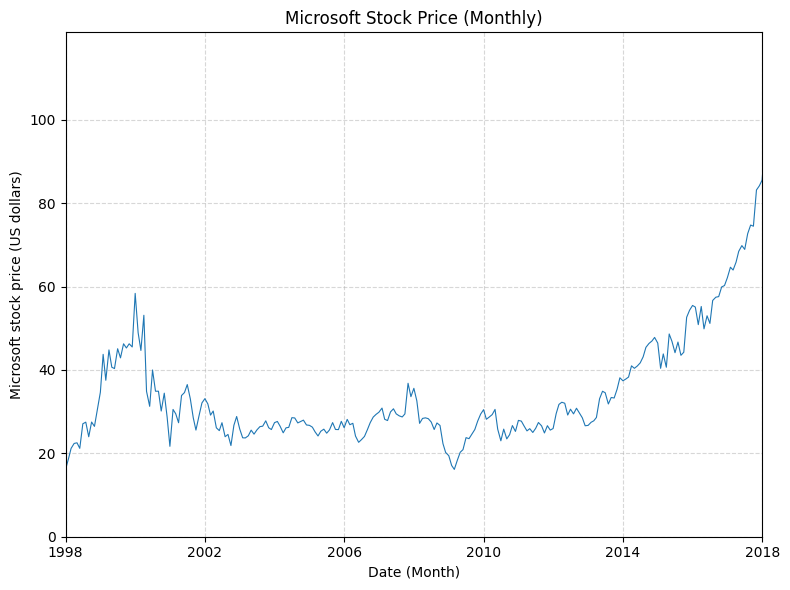

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(data_monthly["date"], data_monthly["p_MSFT"], color="tab:blue", linewidth=0.8)
plt.ylim(0, 121)
plt.yticks(np.arange(0, 120, 20))
plt.xlim(limits)
years = np.linspace(1998, 2018, 6, dtype=int)
plt.xticks([pd.Timestamp(f"{y}-01-01") for y in years], years)
plt.xlabel("Date (Month)")
plt.ylabel("Microsoft stock price (US dollars)", x="Date (Month)")
plt.title("Microsoft Stock Price (Monthly)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [80]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "p_MSFT"), color=color[0], size=0.5)
    + scale_y_continuous(expand=[0.01, 0.01], limits=[0, 120], breaks=seq(0, 120, 20))
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="Microsoft stock price (US dollars)", x="Date (Month)")
    + theme_bw()
)


NameError: name 'color' is not defined

In [ ]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "p_SP500"), color=color[0], size=0.5)
    + scale_y_continuous(
        expand=[0.01, 0.01], limits=[500, 3000], breaks=seq(500, 3000, 500)
    )
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + labs(y="S&P500 stock market index (US dollars)", x="Date (Month)")
    + theme_bw()
)


In [ ]:
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_MSFT"], lags=32, test_type="rho", trend="ct"))


In [ ]:
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="n"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="c"))
print(PhillipsPerron(data_daily["p_SP500"], lags=32, test_type="rho", trend="ct"))


In [ ]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "PctRetMSFT"), color=color[0], size=0.5)
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + geom_hline(yintercept=1.13, color=color[2], size=0.8)
    + labs(y="Microsoft monthly returns (percent)", x="Date (Month)")
    + ylim(-40, 40)
    + theme_bw()
)


In [ ]:
(
    ggplot(data_monthly)
    + geom_line(aes("date", "PctRetSP500"), color=color[0], size=0.5)
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + geom_hline(yintercept=1.13, color=color[2], size=0.8)
    + labs(y="S&P500 index monthly returns (percent)", x="Date (Month)")
    + ylim(-40, 40)
    + theme_bw()
)


In [ ]:
data_monthly.head(2)


In [ ]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetMSFT"], lags=5, test_type="rho", trend="ct"
    )
)


In [ ]:
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="n"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="c"
    )
)
print(
    PhillipsPerron(
        data_monthly.loc[1:, "PctRetSP500"], lags=5, test_type="rho", trend="ct"
    )
)


### Table 12.1 Descriptive statistics on monthly returns

In [ ]:
results = (
    data_monthly[["PctRetMSFT", "PctRetSP500"]]
    .describe()
    .T[["min", "max", "mean", "std", "count"]]
    .rename(columns={"std": "sd", "count": "N"})
)
results.index = ["Monthly returns on Microsoft (%)", "Monthly returns on S&P500 (%)"]
results.round(1)


In [ ]:
reg1 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_monthly).fit()
reg2 = smf.ols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_monthly.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()
reg3 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_daily).fit()
reg4 = smf.ols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_daily.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()


In [ ]:
print(reg1.get_robustcov_results(cov_type="HC1").summary())


In [ ]:
(
    ggplot(data_monthly, aes(x="PctRetSP500", y="PctRetMSFT / 100"))
    + geom_point(color=color[0])
    + geom_smooth(method="lm", se=False, color=color[1])
    + labs(
        x="S&P500 index monthly returns (percent)",
        y="Microsoft stock monthly returns (percent)",
    )
    + scale_y_continuous(labels=percent_format())
    + theme_bw()
    + geom_segment(
        aes(x=-20, y=-0.2, xend=20, yend=0.2),
        color=color[2],
        size=0.5,
        linetype="dashed",
    )
    + geom_segment(aes(x=10, y=0.3, xend=17, yend=0.17), color=color[2], arrow=arrow())
    + annotate(
        "text", x=10, y=0.32, size=7, label="45 degree line for beta=1", color=color[2]
    )
    + geom_segment(
        aes(x=-10, y=-0.23, xend=-15, yend=-0.18), color=color[1], arrow=arrow()
    )
    + annotate(
        "text", x=-10, y=-0.25, size=7, color=color[1], label="reg line, beta=1.26"
    )
)

In [ ]:
data_monthly_tidy = pd.melt(
    data_monthly[["date", "PctRetMSFT", "PctRetSP500"]],
    id_vars=["date"],
    var_name="index",
    value_name="pct_return",
)


In [ ]:
(
    ggplot(data_monthly_tidy)
    + geom_line(aes(x="date", y="pct_return / 100", color="index"), size=0.5)
    + scale_color_manual(
        name="", values=[color[0], color[1]], labels=["Microsoft", "S&P500"]
    )
    + labs(x="Date (month)", y="Monthly returns (percent)")
    + scale_y_continuous(limits=(-0.40, 0.40), labels=percent_format())
    + scale_x_date(breaks=breaks(limits)[::2], labels=date_format("1%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_background=element_blank(),
        legend_title=element_blank()
    )
)

In [ ]:
data_monthly_tidy_17_18 = data_monthly_tidy.loc[
    data_monthly_tidy["date"] > "2017-01-01"
]

In [ ]:
breaks = date_breaks('6 month')
limits = datetime(2017, 1, 1), datetime(2019, 1, 1)

In [ ]:
(
    ggplot(data_monthly_tidy_17_18.reset_index())
    + geom_line(aes(x="date", y="pct_return / 100", color="index"), size=0.5)
    + scale_color_manual(
        name="", values=[color[0], color[1]], labels=["Microsoft", "S&P500"]
    )
    + labs(x="Date (month)", y="Monthly returns (percent)")
    + scale_y_continuous(
        expand=[0.01, 0.01],
        limits=[-0.12, 0.12],
        breaks=seq(-0.12, 0.12, 0.04),
        labels=percent_format(),
    )
    + scale_x_date(breaks=breaks(limits), labels=date_format("%b%Y"))
    + theme_bw()
    + theme(
        legend_position=(0.74, 0.2),
        legend_direction="horizontal",
        legend_background=element_blank(),
        legend_title=element_blank(),
    )
)

In [ ]:
# Regressions


In [ ]:
print(reg2.get_robustcov_results(cov_type="HC1").summary())


In [ ]:
print(reg3.get_robustcov_results(cov_type="HC1").summary())


In [ ]:
print(reg4.get_robustcov_results(cov_type="HC1").summary())


In [ ]:
reg1 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_monthly).fit()
reg2 = smf.ols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_monthly.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()
reg3 = smf.ols("PctRetMSFT ~ PctRetSP500", data=data_daily).fit()
reg4 = smf.ols(
    "d_lnp_MSFT ~ d_lnp_SP500",
    data=data_daily.rename(
        columns={"d.lnp_MSFT": "d_lnp_MSFT", "d.lnp_SP500": "d_lnp_SP500"}
    ),
).fit()


### Table 12.3 Returns on Microsoft and market returns: alternative measurements

In [ ]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(["PctRetSP500", "d_lnp_SP500", "Intercept"])
stargazer.rename_covariates(
    {
        "Intercept": "Constant",
        "PctRetSP500": "S&P500 returns",
        "d_lnp_SP500": "S&P500 returns",
    }
)
stargazer.custom_columns(
    [
        "Monthly pct change",
        "Monthly log change",
        "Daily pct change",
        "Daily log change",
    ],
    [1, 1, 1, 1],
)
stargazer
